<p style="color: Black;
          text-align: center;
          font-size:250%;">
Gotta Catch 'Em All!
</p>

<img src= "https://media.giphy.com/media/AFdcYElkoNAUE/giphy.gif">

1. [Introduction](#1)
2. [Libraries and Utilities](#2)   
3. [Load and Check Data](#3)   
4. [Variable Description](#4)
5. [Data Analysis](#5)
    * [Attack - Defense - Legendary](#6)  
    * [Special Attack - Special Defense - Legendary](#21)
    * [Pokémon Stats by Generation](#23)
    * [Pokémon Stats by Legendary](#24)
    * [Pokémon Stats by Types](#25)
    * [Number of Pokémons by Types](#7) 
    * [Percentages by Legendary and Generation](#8)
    * [Number of Legendary Pokémons by Types](#9)
    * [Attack - Defense - HP - Speed by Generations](#10)
    * [Attack - Defense - HP - Speed by Types](#11)
    * [TOP 5 Strongest Type](#12)
    * [TOP 10 Strongest Pokémon](#22)
    * [Pearson Correlation Map](#13)
6. [Models](#14)
    * [Dependent - Independent Variables](#15)
    * [Train - Test Split](#16)
    * [Standard Scaler](#17)
    * [Logistic Regression](#18)
    * [Hyperparameter Tuning - Grid Search - Cross Validation](#19)
    * [Ensemble Learning](#20)

<a id = "1"></a>
# Introduction
Pokémon, also known as Pocket Monsters in Japan, is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1995, and is centered on fictional creatures called "Pokémon", which humans, known as Pokémon Trainers, catch and train to battle each other for sport. Games, shows and other works within the franchise are set in the Pokémon universe. The English slogan for the franchise is "Gotta Catch 'Em All".

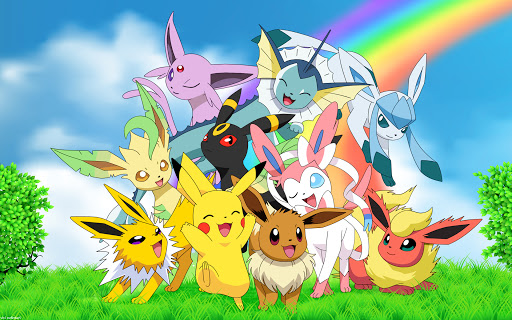

<a id = "2"></a>
# Libraries and Utilities

In [ ]:
!pip install plotly
!pip install cufflinks
!pip install chart_studio

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import colors
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from IPython.display import IFrame

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id = "3"></a>
# Load and Check Data

In [ ]:
df = pd.read_csv('/kaggle/input/pokemon-data/pokemon_data.csv')
df  = df.drop(["#"], axis = 1)
df.head(10)

In [ ]:
print('Data Shape: {}'.format(df.shape))

In [ ]:
df.columns[df.isnull().any()]

<a id = "4"></a>
# Variable Description
This data set includes 800 Pokémons, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, Speed and Legendary. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.
1. **Name:** Name of each pokemon
2. **Type 1:** Each pokemon has a type, this determines weakness/resistance to attacks
3. **Type 2:** Some pokemon are dual type and have 2
4. **HP:** hit points, or health, defines how much damage a pokemon can withstand before fainting
5. **Attack:** the base modifier for normal attacks (eg. Scratch, Punch)
6. **Defense:** the base damage resistance against normal attacks
7. **SP Atk:** special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
8. **SP Def:** the base damage resistance against special attacks 
9. **Speed:** determines which pokemon attacks first each round
10. **Legendary:** indicates whether pokemon is legendary

<img src= "https://media.giphy.com/media/QzxONYL3xbj6E/giphy.gif">

<a id = "5"></a>
# Data Analysis

In [ ]:
print("Types of Pokémons:", df["Type 1"].unique())

In [ ]:
IFrame('https://public.tableau.com/views/Pokmon_16141947229120/Pokemon? :showVizHome=no&:embed=true',
       width=900, height=820)

<a id = "6"></a>
## Attack - Defense - Legendary

In [ ]:
df["Legendary"] = df["Legendary"].astype(str)
F = df[df["Legendary"] == "False"]
T = df[df["Legendary"] == "True"]
plt.figure(figsize=(7,7))
plt.scatter(F["Attack"],F["Defense"],label= "False", color="royalblue", alpha=0.75 )
plt.scatter(T["Attack"],T["Defense"], label = "True", color="red", alpha=0.75)
plt.xlabel("Attack", size = 15)
plt.ylabel("Defense", size = 15)
plt.title(" Attack - Defense - Legendary", size = 16)
plt.legend(loc = 'best')
plt.show()

<a id = "21"></a>
## Special Attack - Special Defense - Legendary

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(F["Sp. Atk"],F["Sp. Def"],
            label= "False", color="royalblue", alpha=0.75)
plt.scatter(T["Sp. Atk"],T["Sp. Def"],
            label = "True", color="red", alpha=0.75)
plt.xlabel("Special Attack", size = 15)
plt.ylabel("Special Defense", size = 15)
plt.title(" Special Attack - Special Defense - Legendary", size = 16)
plt.legend(loc = 'best')
plt.show()

<a id = "23"></a>
## Pokémon Stats by Generation

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Pokémon Stats by Generation', size  = 16)

sns.boxplot(ax=axes[0, 0], data=df,x='Generation', y='Attack')
sns.boxplot(ax=axes[0, 1], data=df,x='Generation', y='Defense')
sns.boxplot(ax=axes[0, 2], data=df,x='Generation', y='Speed')

sns.boxplot(ax=axes[1, 0], data=df,x='Generation', y='Sp. Atk')
sns.boxplot(ax=axes[1, 1], data=df,x='Generation', y='Sp. Def')
sns.boxplot(ax=axes[1, 2], data=df,x='Generation', y='HP')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Pokémon Stats by Generation', size  = 16)

sns.violinplot(ax=axes[0, 0],data=df, x='Generation', y='Attack')
sns.violinplot(ax=axes[0, 1],data=df, x='Generation', y='Defense')
sns.violinplot(ax=axes[0, 2],data=df, x='Generation', y='Speed')

sns.violinplot(ax=axes[1, 0],data=df, x='Generation', y='Sp. Atk')
sns.violinplot(ax=axes[1, 1],data=df, x='Generation', y='Sp. Def')
sns.violinplot(ax=axes[1, 2],data=df, x='Generation', y='HP')
plt.show()

<a id = "24"></a>
## Pokémon Stats by Legendary

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Pokémon Stats by Legendary', size  = 16)

sns.boxplot(ax=axes[0, 0],data=df, x='Legendary', y='Attack')
sns.boxplot(ax=axes[0, 1],data=df, x='Legendary', y='Defense')
sns.boxplot(ax=axes[0, 2],data=df, x='Legendary', y='Speed')

sns.boxplot(ax=axes[1, 0],data=df, x='Legendary', y='Sp. Atk')
sns.boxplot(ax=axes[1, 1],data=df, x='Legendary', y='Sp. Def')
sns.boxplot(ax=axes[1, 2],data=df, x='Legendary', y='HP')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Pokémon Stats by Legendary', size  = 16)

sns.violinplot(ax=axes[0, 0], data=df,x='Legendary', y='Attack')
sns.violinplot(ax=axes[0, 1], data=df,x='Legendary', y='Defense')
sns.violinplot(ax=axes[0, 2], data=df,x='Legendary', y='Speed')

sns.violinplot(ax=axes[1, 0], data=df,x='Legendary', y='Sp. Atk')
sns.violinplot(ax=axes[1, 1], data=df,x='Legendary', y='Sp. Def')
sns.violinplot(ax=axes[1, 2], data=df,x='Legendary', y='HP')
plt.show()

<a id = "25"></a>
## Pokémon Stats by Types

In [ ]:
target_cols = ["Attack","Defense","HP","Speed","Sp. Def","Sp. Atk"]
avg_skills = pd.DataFrame([[df[df["Type 1"] == i][skill].mean() for i in df["Type 1"].unique()] for skill in target_cols],
                          index = target_cols,
                          columns= df["Type 1"].unique()).T
for i in range(len(avg_skills.index)):
    fig = px.line_polar(avg_skills,
                        r=avg_skills.iloc[i,],
                        theta=avg_skills.columns,
                        line_close=True,
                        title = avg_skills.index[i],
                        width=600,
                        height=400,
                        template="plotly_dark")
    fig.update_traces(fill='toself')
    fig.update_polars(radialaxis_range=[i,round(avg_skills.max().max(),) + 4])
    fig.show()

<a id = "7"></a>
## Number of Pokémons by Types

In [ ]:
tp1_sum = df["Type 1"].value_counts().sum()
tp2_sum = df["Type 2"].value_counts().sum()
tp1_count = []
tp2_count = []
pokemon_counts = []
for i in df["Type 1"].unique():
    pokemon_counts.append(df[df["Type 1"] == i].count()["Type 1"] + df[df["Type 2"] == i].count()["Type 2"])
    tp1_count.append(df[df["Type 1"] == i].count()["Type 1"])
    tp2_count.append(df[df["Type 2"] == i].count()["Type 2"])

fig, axs = plt.subplots(2, 2, figsize =(12,10))
fig.suptitle('Number of Pokémons by Types', size = 16)
axs[0, 0].barh(df["Type 1"].unique(),tp1_count, color = "mediumpurple")
axs[0, 0].set_title('Type 1', size = 14)

axs[0, 1].barh(df["Type 1"].unique(),tp2_count, color = "mediumpurple")
axs[0, 1].set_title('Type 2', size = 14)

axs[1, 0].barh(df["Type 1"].unique(),pokemon_counts, color = "mediumpurple")
axs[1, 0].set_title('Sum of Type 1 and Type 2', size = 14)

axs[1, 1].barh(["Type 1","Type 2"],[tp1_sum,tp2_sum],color = "mediumpurple")
axs[1, 1].set_title('Type 1 and Type 2', size = 14);

<a id = "8"></a>
## Percentages by Legendary and Generation

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df['Legendary'].value_counts().keys(),
                             values=df['Legendary'].value_counts().values)])

fig.update_traces(hoverinfo='value',
                  textinfo='label',
                  textfont_size=16,
                  textposition ='auto',
                  showlegend=False,
                  marker=dict(colors=['#337DFF', '#FF5733'],line=dict(color='black', width = 0.6)))

fig.update_layout(title={'text': 'Legendary',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                 template='simple_white')
iplot(fig)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df['Generation'].value_counts().keys(),
                             values=df['Generation'].value_counts().values)])
fig.update_traces(hoverinfo='value',
                  textinfo='label',
                  textfont_size=22,
                  textposition ='auto',
                  showlegend=False,
                  marker=dict(colors=['#28F20C', '#F7322C', '#F27F0C', '#F12CF7','#337DFF','#F7F72C'],
                              line=dict(color='black', width = 0.6)))

fig.update_layout(title={'text': 'Generation',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                 template='simple_white')
iplot(fig)

<a id = "9"></a>
## Number of Legendary Pokémons by Types

In [ ]:
cat = sns.catplot(y="Type 1", hue="Legendary", kind="count",
            edgecolor=".6", palette = "Set2",
            legend =True,
            data=df)
cat.fig.set_size_inches(10,6)
plt.yticks(size = 12)
cat.set(xlabel=None)
cat.set(ylabel=None)
cat.set(title='Number of Legendary Pokémons by Types')
plt.show()

<a id = "10"></a>
## Attack - Defense - HP - Speed by Generations

In [ ]:
generation_df = df.groupby('Generation').agg({'Attack':'mean',
                                              'Defense':'mean',
                                              'HP':'mean',
                                              'Speed':'mean'})

trace1 = go.Scatter(x=generation_df.index, y= generation_df['Attack'],
                    mode='lines', name='Attack',line = dict(color='#FF2F01',width=3))

trace2 = go.Scatter(x=generation_df.index, y= generation_df['Defense'],
                    mode='lines', name='Defense',line = dict(color='#79F72C',width=3))

trace3 = go.Scatter(x=generation_df.index, y= generation_df['HP'],
                    mode='lines', name='HP',line = dict(color='#2CA4F7',width=3))

trace4 = go.Scatter(x=generation_df.index, y= generation_df['Speed'],
                    mode='lines', name='Speed',line = dict(color='#9E2CF7',width=3))

layout = go.Layout(title={'text': "Attack - Defense - HP - Speed by Generations",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Generation'),template='plotly_white')

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
iplot(fig)

<img src= "https://media.giphy.com/media/s6V4JivpKeXBe/giphy.gif">

<a id = "11"></a>
## Attack - Defense - HP - Speed by Types

In [ ]:
attack_avg = []
defense_avg = []
hp_avg = []
speed_avg = []
for i in df["Type 1"].unique():
    attack_avg.append(df[df["Type 1"] == i]["Attack"].mean())
    defense_avg.append(df[df["Type 1"] == i]["Defense"].mean())
    hp_avg.append(df[df["Type 1"] == i]["HP"].mean())
    speed_avg.append(df[df["Type 1"] == i]["Speed"].mean())
    

fig, axs = plt.subplots(2, 2, figsize =(12,10))
fig.suptitle('Attack - Defense - HP - Speed by Types', size = 16)
axs[0, 0].barh(df["Type 1"].unique(), attack_avg, color = "cornflowerblue")
axs[0, 0].set_title('Attack', size = 14)

axs[0, 1].barh(df["Type 1"].unique(), defense_avg, color = "cornflowerblue")
axs[0, 1].set_title('Defense', size = 14)

axs[1, 0].barh(df["Type 1"].unique(), hp_avg, color = "cornflowerblue")
axs[1, 0].set_title('HP', size = 14)

axs[1, 1].barh(df["Type 1"].unique(), speed_avg, color = "cornflowerblue")
axs[1, 1].set_title('Speed', size = 14)
fig.tight_layout()

<a id = "12"></a>
## TOP 5 Strongest Type

In [ ]:
total = df["HP"] + df["Attack"] + df["Defense"] + df["Sp. Atk"] + df["Sp. Def"] + df["Speed"]
top5_type = {'Type': df["Type 1"] ,'Overall': total}
top5_type = pd.DataFrame(top5_type)
top5_type = top5_type[["Overall","Type"]].groupby(["Type"], as_index = False).mean().sort_values(by="Overall",ascending = False)[0:5]

plt.figure(figsize = (10,6))
plt.title("TOP 5 Strongest Type", size = 16)
sns.barplot(x = "Overall", y = "Type",
            ci = None, data = top5_type,
            dodge = False, palette = "Dark2")
plt.yticks(size = 12)
plt.show()

<a id = "22"></a>
## TOP 10 Strongest Pokémon

In [ ]:
top10_pokemon = {'Name': df["Name"], 'Type': df["Type 1"] ,'Overall': total}
top10_pokemon = pd.DataFrame(top10_pokemon)
top10_pokemon = top10_pokemon[["Name","Type","Overall"]].sort_values(by = "Overall", ascending = False)[0:10]

plt.figure(figsize = (12,8))
plt.title("TOP 10 Strongest Pokémon", size = 16)
sns.barplot(x = "Overall", y = "Name", hue = "Type", data = top10_pokemon, dodge = False)
plt.yticks(size = 12)
plt.show()

<img src= "https://media.giphy.com/media/4V9pnhxTv6eha/giphy.gif">

<a id = "13"></a>
## Pearson Correlation Map

In [ ]:
sns.set_style("white")
matrix = np.triu(df.corr(method="pearson"))
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "coolwarm",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 14})
plt.xticks(rotation=60,size=14)
plt.yticks(rotation=0,size=14)
plt.title('Pearson Correlation Map', size = 14)
plt.show()

<img src= "https://media.giphy.com/media/gHnwTttExPf4nwOWm7/giphy.gif">

<a id = "14"></a>
# Models
<a id = "15"></a>
## Dependent - Independent Variables
- Legendary is dependent variable.
- Attack, Defense, HP, Speed, Sp. Atk and Sp. Def are independent variables.

In [ ]:
y = df["Legendary"].values
X = df.drop(["Name","Type 1","Type 2",
             "Legendary","Generation"], axis= 1)
X.head()

<a id = "16"></a>
## Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

<a id = "17"></a>
## Scaling

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = "18"></a>
## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)

print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

In [ ]:
lr_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, lr_pred)
df1 = pd.DataFrame(columns=["Not","Legendary"], index= ["Not","Legendary"], data= cm )

f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(df1, annot=True,cmap="Reds",
            fmt= '.0f',ax=ax,linewidths = 5,
            cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

<a id = "19"></a>
## Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

- Decision Tree
- SVM
- Random Forest
- KNN
- Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {'C' : np.logspace(-4, 4, 20),
                "penalty": ['l1','l2']}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 2)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result,
                           "ML Models":["DecisionTreeClassifier",
                                        "SVC","RandomForestClassifier",
                                        "LogisticRegression",
                                        "KNeighborsClassifier"]})

plt.figure(figsize = (8,6))
g = sns.barplot("Cross Validation Means",
                "ML Models", data = cv_results,
               palette = "Set1")
g.set_xlabel("Mean Accuracy")
plt.xlim(0.9,1)
g.set_title("Cross Validation Scores");

<a id = "20"></a>
## Ensemble Learning

In [ ]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                        ("rf",best_estimators[2]),
                                        ("knn",best_estimators[4])])

votingC = votingC.fit(X_train, y_train)
voting_pred = votingC.predict(X_test)

print(classification_report(y_test, voting_pred))

In [ ]:
cm = confusion_matrix(y_test, voting_pred)

df1 = pd.DataFrame(columns=["Not","Legendary"], index= ["Not","Legendary"], data= cm )
f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds",
            fmt= '.0f',ax=ax,linewidths = 5,
            cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

<img src= "https://media.giphy.com/media/10LKovKon8DENq/giphy.gif">